In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/빅예분3조/Data/prescale/KPU_DATA_MERGE1.csv', encoding='euc-kr')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8465 non-null   int64  
 1   ACPT_YM           8465 non-null   int64  
 2   PLCST_NM          8465 non-null   object 
 3   RPRT_CASCNT_WHOL  8465 non-null   int64  
 4   TIZN_1            8465 non-null   int64  
 5   TIZN_2            8465 non-null   int64  
 6   TIZN_3            8465 non-null   int64  
 7   TIZN_4            8465 non-null   int64  
 8   OCRN_DOTW_SNDD    8465 non-null   int64  
 9   OCRN_DOTW_MON     8465 non-null   int64  
 10  OCRN_DOTW_TUE     8465 non-null   int64  
 11  OCRN_DOTW_WED     8465 non-null   int64  
 12  OCRN_DOTW_THU     8465 non-null   int64  
 13  OCRN_DOTW_FRI     8465 non-null   int64  
 14  OCRN_DOTW_SAT     8465 non-null   int64  
 15  ADDR              8465 non-null   object 
 16  SI                8465 non-null   object 


In [ ]:
df.reset_index()

,index,Unnamed: 0,ACPT_YM,PLCST_NM,RPRT_CASCNT_WHOL,TIZN_1,TIZN_2,TIZN_3,TIZN_4,OCRN_DOTW_SNDD,...,OCRN_DOTW_TUE,OCRN_DOTW_WED,OCRN_DOTW_THU,OCRN_DOTW_FRI,OCRN_DOTW_SAT,ADDR,SI,SGG,LON,LAT
0,0,0,201901,서울중랑경찰서,37,21,16,0,0,6,...,4,5,6,3,5,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
1,1,1,201901,서울노원경찰서,62,22,38,1,1,6,...,13,7,16,5,9,서울특별시 노원구 노원로 283(하계동),서울특별시,노원구,37.641975,127.070799
2,2,2,201901,부산해운대경찰서,37,13,24,0,0,3,...,7,6,3,8,5,부산광역시 해운대구 달맞이길62번길 42(중동),부산광역시,해운대구,35.158240,129.171762
3,3,3,201901,울산중부경찰서,56,37,19,0,0,7,...,9,8,4,11,11,울산광역시 중구 번영로 620(남외동),울산광역시,중구,35.569829,129.349216
4,4,4,201901,대구성서경찰서,24,18,6,0,0,6,...,5,0,5,2,5,대구광역시 달서구 달구벌대로259길 15(이곡동),대구광역시,달서구,35.853219,128.508774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,8460,8460,202112,인천논현경찰서,39,18,20,0,1,8,...,7,1,4,4,14,인천광역시 남동구 논현고잔로 239,인천광역시,남동구,37.404077,126.715039
8461,8461,8461,202112,부산중부경찰서,19,12,7,0,0,0,...,0,2,6,4,6,부산광역시 중구 중앙대로 105(대창동1가),부산광역시,중구,35.107421,129.035925
8462,8462,8462,202112,대전서부경찰서,20,8,12,0,0,4,...,1,4,3,2,3,대전광역시 서구 복수서로 47(복수동),대전광역시,서구,36.309045,127.373459
8463,8463,8463,202112,함안경찰서,1,1,0,0,0,0,...,0,0,0,0,0,경상남도 함안군 가야읍 가야로 85,경상남도,함안군,35.279147,128.410910


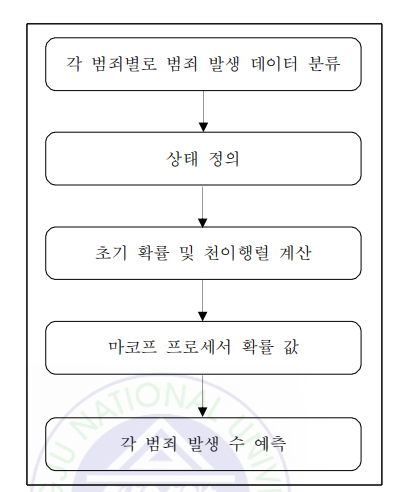

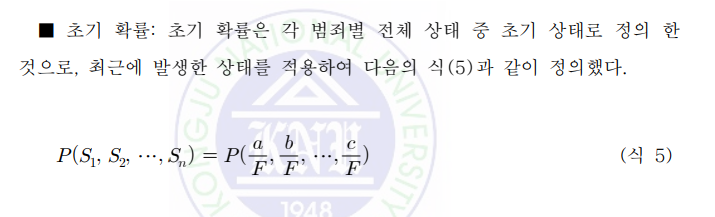

In [ ]:
# 1. 각 분류 -> 시간대 별(4분류), 요일 별 (7개)

In [ ]:
# 2. 초기확률 설정

In [ ]:
# 상태 전이 상태 4개로 나뉨
# 상태 전이 상태 4개로 나뉨, 각 사분위수 값을 임계값으로 둠
df_1q = df.groupby(['PLCST_NM'])['TIZN_1','TIZN_2','TIZN_3','TIZN_4','OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT'].quantile(0.25)
df_2q = df.groupby(['PLCST_NM'])['TIZN_1','TIZN_2','TIZN_3','TIZN_4','OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT'].quantile(0.5)
df_3q = df.groupby(['PLCST_NM'])['TIZN_1','TIZN_2','TIZN_3','TIZN_4','OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT'].quantile(0.75)
df_4q = df.groupby(['PLCST_NM'])['TIZN_1','TIZN_2','TIZN_3','TIZN_4','OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT'].quantile(1)

<ipython-input-8-83eecb0c0b7e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_1q = df.groupby(['PLCST_NM'])['TIZN_1','TIZN_2','TIZN_3','TIZN_4','OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT'].quantile(0.25)
<ipython-input-8-83eecb0c0b7e>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2q = df.groupby(['PLCST_NM'])['TIZN_1','TIZN_2','TIZN_3','TIZN_4','OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT'].quantile(0.5)
<ipython-input-8-83eecb0c0b7e>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_3q = df.groupby(['PLCST_NM'])['TIZN_1','TIZN_2','TIZN_3','TIZN_4','OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCR

In [ ]:
df_1q.rename(columns = lambda x: "1Q_" + x, inplace = True)
df_2q.rename(columns = lambda x: "2Q_" + x, inplace = True)
df_3q.rename(columns = lambda x: "3Q_" + x, inplace = True)
df_4q.rename(columns = lambda x: "4Q_" + x, inplace = True)

In [ ]:
df_1q = df_1q.astype('int')
df_2q = df_2q.astype('int')
df_3q = df_3q.astype('int')
df_4q = df_4q.astype('int')

In [ ]:
df_1q.reset_index(inplace=True)
df_2q.reset_index(inplace=True)
df_3q.reset_index(inplace=True)
df_4q.reset_index(inplace=True)

In [ ]:
df_1q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PLCST_NM           275 non-null    object
 1   1Q_TIZN_1          275 non-null    int64 
 2   1Q_TIZN_2          275 non-null    int64 
 3   1Q_TIZN_3          275 non-null    int64 
 4   1Q_TIZN_4          275 non-null    int64 
 5   1Q_OCRN_DOTW_SNDD  275 non-null    int64 
 6   1Q_OCRN_DOTW_MON   275 non-null    int64 
 7   1Q_OCRN_DOTW_TUE   275 non-null    int64 
 8   1Q_OCRN_DOTW_WED   275 non-null    int64 
 9   1Q_OCRN_DOTW_THU   275 non-null    int64 
 10  1Q_OCRN_DOTW_FRI   275 non-null    int64 
 11  1Q_OCRN_DOTW_SAT   275 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 25.9+ KB


In [ ]:
df_quater = pd.merge(df_1q,df_2q, how='left', on='PLCST_NM')

In [ ]:
df_quater = pd.merge(df_quater,df_3q, how='left', on='PLCST_NM')
df_quater = pd.merge(df_quater,df_4q, how='left', on='PLCST_NM')

In [ ]:
df_quater.columns

Index(['Unnamed: 0', 'PLCST_NM', '1Q_TIZN_1', '1Q_TIZN_2', '1Q_TIZN_3',
       '1Q_TIZN_4', '1Q_OCRN_DOTW_SNDD', '1Q_OCRN_DOTW_MON',
       '1Q_OCRN_DOTW_TUE', '1Q_OCRN_DOTW_WED', '1Q_OCRN_DOTW_THU',
       '1Q_OCRN_DOTW_FRI', '1Q_OCRN_DOTW_SAT', '2Q_TIZN_1', '2Q_TIZN_2',
       '2Q_TIZN_3', '2Q_TIZN_4', '2Q_OCRN_DOTW_SNDD', '2Q_OCRN_DOTW_MON',
       '2Q_OCRN_DOTW_TUE', '2Q_OCRN_DOTW_WED', '2Q_OCRN_DOTW_THU',
       '2Q_OCRN_DOTW_FRI', '2Q_OCRN_DOTW_SAT', '3Q_TIZN_1', '3Q_TIZN_2',
       '3Q_TIZN_3', '3Q_TIZN_4', '3Q_OCRN_DOTW_SNDD', '3Q_OCRN_DOTW_MON',
       '3Q_OCRN_DOTW_TUE', '3Q_OCRN_DOTW_WED', '3Q_OCRN_DOTW_THU',
       '3Q_OCRN_DOTW_FRI', '3Q_OCRN_DOTW_SAT', '4Q_TIZN_1', '4Q_TIZN_2',
       '4Q_TIZN_3', '4Q_TIZN_4', '4Q_OCRN_DOTW_SNDD', '4Q_OCRN_DOTW_MON',
       '4Q_OCRN_DOTW_TUE', '4Q_OCRN_DOTW_WED', '4Q_OCRN_DOTW_THU',
       '4Q_OCRN_DOTW_FRI', '4Q_OCRN_DOTW_SAT'],
      dtype='object')

In [ ]:
df_quater[['PLCST_NM','1Q_TIZN_1','2Q_TIZN_1','3Q_TIZN_1','4Q_TIZN_1']]

,PLCST_NM,1Q_TIZN_1,2Q_TIZN_1,3Q_TIZN_1,4Q_TIZN_1
0,ETC,50,94,201,574
1,가평경찰서,1,2,3,12
2,강남경찰서,6,9,14,28
3,강릉경찰서,12,17,24,36
4,강원경찰청,0,1,1,1
...,...,...,...,...,...
270,화성동탄경찰서,29,41,66,95
271,화성서부경찰서,18,28,38,61
272,화순경찰서,7,13,17,27
273,화천경찰서,1,1,2,3


In [ ]:
df_quater.to_csv('/content/drive/MyDrive/빅예분3조/Data/prescale/KPU_DATA_MERGE1_4Q.csv', encoding='euc-kr')

In [ ]:
df_quater = pd.read_csv('/content/drive/MyDrive/빅예분3조/Data/prescale/KPU_DATA_MERGE1_4Q.csv', encoding='euc-kr')

In [ ]:
#파이썬 컬럼 다 나오도록
pd.set_option('display.max_columns', None)

In [ ]:
df_quater

,Unnamed: 0,PLCST_NM,1Q_TIZN_1,1Q_TIZN_2,1Q_TIZN_3,1Q_TIZN_4,1Q_OCRN_DOTW_SNDD,1Q_OCRN_DOTW_MON,1Q_OCRN_DOTW_TUE,1Q_OCRN_DOTW_WED,1Q_OCRN_DOTW_THU,1Q_OCRN_DOTW_FRI,1Q_OCRN_DOTW_SAT,2Q_TIZN_1,2Q_TIZN_2,2Q_TIZN_3,2Q_TIZN_4,2Q_OCRN_DOTW_SNDD,2Q_OCRN_DOTW_MON,2Q_OCRN_DOTW_TUE,2Q_OCRN_DOTW_WED,2Q_OCRN_DOTW_THU,2Q_OCRN_DOTW_FRI,2Q_OCRN_DOTW_SAT,3Q_TIZN_1,3Q_TIZN_2,3Q_TIZN_3,3Q_TIZN_4,3Q_OCRN_DOTW_SNDD,3Q_OCRN_DOTW_MON,3Q_OCRN_DOTW_TUE,3Q_OCRN_DOTW_WED,3Q_OCRN_DOTW_THU,3Q_OCRN_DOTW_FRI,3Q_OCRN_DOTW_SAT,4Q_TIZN_1,4Q_TIZN_2,4Q_TIZN_3,4Q_TIZN_4,4Q_OCRN_DOTW_SNDD,4Q_OCRN_DOTW_MON,4Q_OCRN_DOTW_TUE,4Q_OCRN_DOTW_WED,4Q_OCRN_DOTW_THU,4Q_OCRN_DOTW_FRI,4Q_OCRN_DOTW_SAT
0,0,ETC,50,35,1,1,13,9,11,12,9,11,15,94,74,2,1,25,21,19,22,20,27,36,201,182,5,4,58,51,56,59,65,67,52,574,448,16,16,164,114,106,157,144,181,208
1,1,가평경찰서,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,2,0,0,1,1,0,1,1,1,1,12,5,1,1,2,2,2,4,5,3,5
2,2,강남경찰서,6,3,0,0,1,1,1,1,1,1,1,9,6,0,0,2,3,2,2,2,3,2,14,8,1,0,3,4,4,3,4,4,4,28,19,2,2,8,8,8,9,8,9,9
3,3,강릉경찰서,12,8,0,0,2,2,3,2,2,3,3,17,13,0,0,3,4,4,4,4,4,6,24,18,1,0,5,6,5,6,6,6,8,36,26,3,2,11,13,10,10,13,14,13
4,4,강원경찰청,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,270,화성동탄경찰서,29,25,0,0,7,6,6,7,7,7,8,41,34,0,0,11,10,9,9,11,12,13,66,41,1,1,15,12,12,14,15,20,19,95,61,3,5,29,28,20,25,22,39,41
271,271,화성서부경찰서,18,10,0,0,4,3,3,3,4,5,4,28,17,0,0,7,4,5,7,6,7,7,38,24,0,0,9,8,8,10,10,11,11,61,39,2,1,22,15,21,16,17,27,18
272,272,화순경찰서,7,3,0,0,1,1,1,1,1,1,1,13,4,0,0,3,2,2,2,2,4,4,17,7,0,0,4,3,3,3,2,5,6,27,14,1,1,10,9,6,6,7,9,11
273,273,화천경찰서,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,1,0,1,0,1,3,3,0,0,2,1,2,1,2,1,2


In [ ]:
# 4-1. 각 로우 상태값 열 만들기

In [ ]:
df_yymm = df['ACPT_YM']
yymm_list = df_yymm.to_list()
yymm_list = list(set(yymm_list))

In [ ]:
yymm_list.sort()

In [ ]:
yymm_list

[201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112]

In [ ]:
df_plcst_nm = df['PLCST_NM']
plsct_nm_list = df_plcst_nm.to_list()
plsct_nm_list = list(set(plsct_nm_list))

In [ ]:
plsct_nm_list

['부산동부경찰서',
 '성주경찰서',
 '인천남동경찰서',
 '인천서부경찰서',
 '기장경찰서',
 '영광경찰서',
 '서울관악경찰서',
 '대전유성경찰서',
 '광주경찰서',
 '서울노원경찰서',
 '강남경찰서',
 '합천경찰서',
 '경산경찰서',
 '밀양경찰서',
 '서울강동경찰서',
 '서울마포경찰서',
 '서울양천경찰서',
 '고성경찰서',
 '부산남부경찰서',
 '서울강서경찰서',
 '부산진경찰서',
 '안양만안경찰서',
 '진주경찰서',
 '대전중부경찰서',
 '충주경찰서',
 '옥천경찰서',
 '안산상록경찰서',
 '완주경찰서',
 '창녕경찰서',
 '부천오정경찰서',
 '서울중부경찰서',
 '하남경찰서',
 '안동경찰서',
 '충청북도경찰청',
 '금천경찰서',
 '양구경찰서',
 '서울동대문경찰서',
 '성남수정경찰서',
 '김해서부경찰서',
 '충청남도경찰청',
 '태안경찰서',
 '일산동부경찰서',
 '창원서부경찰서',
 '경기남부경찰청',
 '전북경찰청',
 '인천경찰청',
 '고령경찰서',
 '김제경찰서',
 '은평경찰서',
 '경기북부경찰청',
 '청양경찰서',
 '동부경찰서',
 '포항남부경찰서',
 '인천부평경찰서',
 '안양동안경찰서',
 '대구성서경찰서',
 '진안경찰서',
 '담양경찰서',
 '대구남부경찰서',
 '마산동부경찰서',
 '진천경찰서',
 '부산금정경찰서',
 '전라남도경찰청',
 '용인동부경찰서',
 '서울동작경찰서',
 '대구중부경찰서',
 '부산사상경찰서',
 '경찰청',
 '함안경찰서',
 '평창경찰서',
 '대전서부경찰서',
 '구미경찰서',
 '서울구로경찰서',
 '여주경찰서',
 '성남중원경찰서',
 '제주경찰청',
 '수원서부경찰서',
 '원주경찰서',
 '영천경찰서',
 '일산서부경찰서',
 '서천경찰서',
 '장성경찰서',
 '울릉경찰서',
 '의령경찰서',
 '남원경찰서',
 '화천경찰서',
 '영등포경찰서',
 '영양경찰서',
 '경비교통과',
 '대구북부경찰서',
 '부천원미경찰서',
 

In [ ]:
time_list = ['TIZN_1','TIZN_2','TIZN_3','TIZN_4']
day_list = ['OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT']

In [ ]:
# STATE 컬럼 정의
df['TIZN_1_STATE'] = 0
df['TIZN_2_STATE'] = 0
df['TIZN_3_STATE'] = 0
df['TIZN_4_STATE'] = 0
df['OCRN_DOTW_SNDD_STATE'] = 0
df['OCRN_DOTW_MON_STATE'] = 0
df['OCRN_DOTW_TUE_STATE'] = 0
df['OCRN_DOTW_WED_STATE'] = 0
df['OCRN_DOTW_THU_STATE'] = 0
df['OCRN_DOTW_FRI_STATE'] = 0
df['OCRN_DOTW_SAT_STATE'] = 0

In [ ]:
for yymm in yymm_list:
  for plsct in plsct_nm_list:
    if len(df[(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)]) > 0:
      # 시간대별 1,2,3,4
      for time in time_list:
        if df[time][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] < df_quater['1Q_'+time][df_quater['PLCST_NM'] == plsct].values[0]:
          df.loc[(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm),time+'_STATE'] = 1
        elif (df[time][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] >= df_quater['1Q_'+time][df_quater['PLCST_NM'] == plsct].values[0]) and (df[time][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] < df_quater['2Q_'+time][df_quater['PLCST_NM'] == plsct].values[0]):
          df.loc[(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm),time+'_STATE'] = 2
        elif (df[time][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] >= df_quater['2Q_'+time][df_quater['PLCST_NM'] == plsct].values[0] and df[time][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] < df_quater['3Q_'+time][df_quater['PLCST_NM'] == plsct].values[0]):
          df.loc[(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm),time+'_STATE'] = 3
        elif df[time][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] >= df_quater['3Q_'+time][df_quater['PLCST_NM'] == plsct].values[0]:
          df.loc[(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm),time+'_STATE'] = 4

      # 요일별 일,월,화,수,목.금,토
      for day in day_list:
        print(plsct)
        if df[day][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] < df_quater['1Q_'+day][df_quater['PLCST_NM'] == plsct].values[0]:
          df.loc[(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm),day+'_STATE'] = 1
        elif (df[day][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] >= df_quater['1Q_'+day][df_quater['PLCST_NM'] == plsct].values[0]) and (df[day][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] < df_quater['2Q_'+day][df_quater['PLCST_NM'] == plsct].values[0]):
          df.loc[(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm),day+'_STATE'] = 2
        elif (df[day][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] >= df_quater['2Q_'+day][df_quater['PLCST_NM'] == plsct].values[0] and df[day][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] < df_quater['3Q_'+day][df_quater['PLCST_NM'] == plsct].values[0]):
          df.loc[(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm),day+'_STATE'] = 3
        elif df[day][(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm)].values[0] >= df_quater['3Q_'+day][df_quater['PLCST_NM'] == plsct].values[0]:
          df.loc[(df['PLCST_NM'] == plsct) & (df['ACPT_YM'] == yymm),day+'_STATE'] = 4

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
부산서부경찰서
부산서부경찰서
부여경찰서
부여경찰서
부여경찰서
부여경찰서
부여경찰서
부여경찰서
부여경찰서
괴산경찰서
괴산경찰서
괴산경찰서
괴산경찰서
괴산경찰서
괴산경찰서
괴산경찰서
광주서부경찰서
광주서부경찰서
광주서부경찰서
광주서부경찰서
광주서부경찰서
광주서부경찰서
광주서부경찰서
부안경찰서
부안경찰서
부안경찰서
부안경찰서
부안경찰서
부안경찰서
부안경찰서
대구서부경찰서
대구서부경찰서
대구서부경찰서
대구서부경찰서
대구서부경찰서
대구서부경찰서
대구서부경찰서
인천미추홀경찰서
인천미추홀경찰서
인천미추홀경찰서
인천미추홀경찰서
인천미추홀경찰서
인천미추홀경찰서
인천미추홀경찰서
구리경찰서
구리경찰서
구리경찰서
구리경찰서
구리경찰서
구리경찰서
구리경찰서
단양경찰서
단양경찰서
단양경찰서
단양경찰서
단양경찰서
단양경찰서
단양경찰서
강진경찰서
강진경찰서
강진경찰서
강진경찰서
강진경찰서
강진경찰서
강진경찰서
홍천경찰서
홍천경찰서
홍천경찰서
홍천경찰서
홍천경찰서
홍천경찰서
홍천경찰서
천안동남경찰서
천안동남경찰서
천안동남경찰서
천안동남경찰서
천안동남경찰서
천안동남경찰서
천안동남경찰서
수원남부경찰서
수원남부경찰서
수원남부경찰서
수원남부경찰서
수원남부경찰서
수원남부경찰서
수원남부경찰서
부산영도경찰서
부산영도경찰서
부산영도경찰서
부산영도경찰서
부산영도경찰서
부산영도경찰서
부산영도경찰서
서울남대문경찰서
서울남대문경찰서
서울남대문경찰서
서울남대문경찰서
서울남대문경찰서
서울남대문경찰서
서울남대문경찰서
사천경찰서
사천경찰서
사천경찰서
사천경찰서
사천경찰서
사천경찰서
사천경찰서
울산울주경찰서
울산울주경찰서
울산울주경찰서
울산울주경찰서
울산울주경찰서
울산울주경찰서
울산울주경찰서
진해경찰서
진해경찰서
진해경찰서
진해경찰서
진해경찰서
진해경찰서
진해경찰서
정읍경찰서
정읍경찰서
정읍경찰서
정읍경찰서
정읍경찰서
정읍경찰서
정읍경찰서
안산단원경찰서
안산단원경찰서
안산단원경찰서
안산단원경찰서
안산단원경찰서
안산단원경찰서
안산단원경찰서
군산경찰서
군산경찰

In [ ]:
df.to_csv('/content/drive/MyDrive/빅예분3조/Data/prescale/KPU_DATA_MERGE1_STATE.csv', encoding='euc-kr')

In [ ]:
df_state = pd.read_csv('/content/drive/MyDrive/빅예분3조/Data/prescale//KPU_DATA_MERGE1_STATE.csv', encoding='euc-kr')

In [ ]:
df_state.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ACPT_YM', 'PLCST_NM', 'RPRT_CASCNT_WHOL',
       'TIZN_1', 'TIZN_2', 'TIZN_3', 'TIZN_4', 'OCRN_DOTW_SNDD',
       'OCRN_DOTW_MON', 'OCRN_DOTW_TUE', 'OCRN_DOTW_WED', 'OCRN_DOTW_THU',
       'OCRN_DOTW_FRI', 'OCRN_DOTW_SAT', 'ADDR', 'SI', 'SGG', 'LON', 'LAT',
       'TIZN_1_STATE', 'TIZN_2_STATE', 'TIZN_3_STATE', 'TIZN_4_STATE',
       'OCRN_DOTW_SNDD_STATE', 'OCRN_DOTW_MON_STATE', 'OCRN_DOTW_TUE_STATE',
       'OCRN_DOTW_WED_STATE', 'OCRN_DOTW_THU_STATE', 'OCRN_DOTW_FRI_STATE',
       'OCRN_DOTW_SAT_STATE'],
      dtype='object')